An entire Bayesian optimization process is shown here

In [12]:
%matplotlib inline
import jax
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt
import numpy as np
from optim_process import optim_process
# from optim_process_normal import optim_process # normalization
import screen

1 dim input

In [13]:
constrains = {'X': (-1.0, 2.0)}
noise = 1e-3 # cannot be too small, or grad would be nan
n_init = 3
dim = 1

# Define your objective function using JAX
def f(X, noise=noise):
    return -jnp.sin(3 * X) - X**2 + 0.7 * X + noise * random.normal(random.PRNGKey(0), X.shape)


optimize 

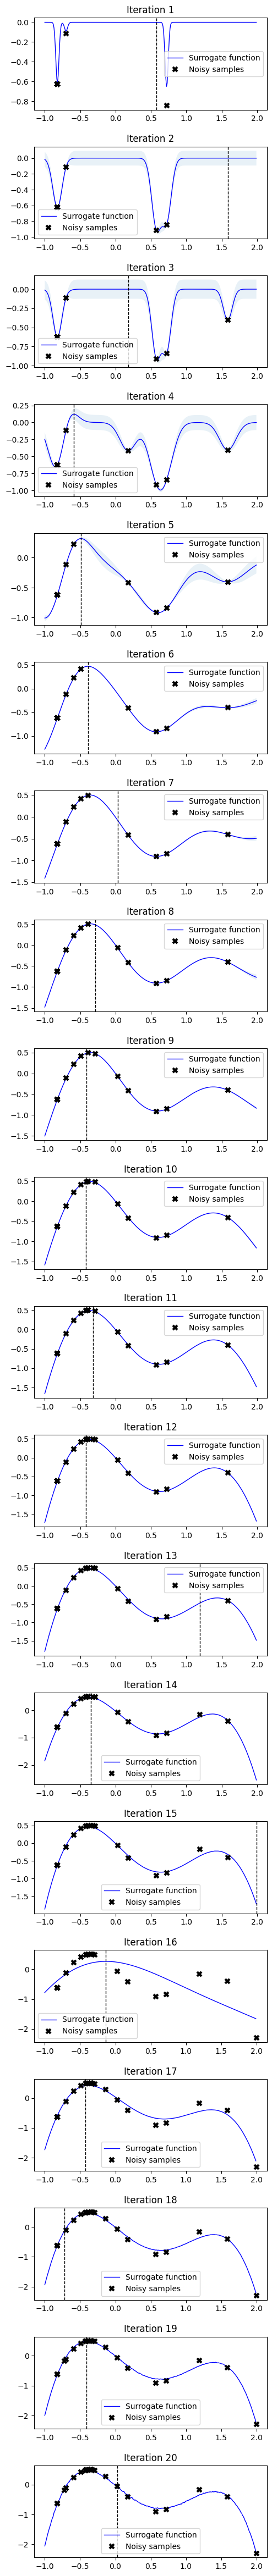

In [14]:
optimizer_params = optim_process(
    f,
    constrains,
    noise,
    n_init = n_init,
    seed = 42,
    dim = dim,
    n = 20,
    num_steps = 20,
    lr = 0.01,
    plot_figure = True)

In [15]:
optimizer_params.target

0.4997313320636749

In [16]:
optimizer_params.params_all

Array([[ 0.7224331 ],
       [-0.69952536],
       [-0.82161665],
       [ 0.57615864],
       [ 1.585455  ],
       [ 0.1780541 ],
       [-0.58684856],
       [-0.48784372],
       [-0.3902276 ],
       [ 0.02950227],
       [-0.2897539 ],
       [-0.4131595 ],
       [-0.41625762],
       [-0.3203057 ],
       [-0.42074513],
       [ 1.1917157 ],
       [-0.35015118],
       [ 1.9968324 ],
       [-0.13366456],
       [-0.42229152],
       [-0.7180315 ],
       [-0.4124081 ],
       [ 0.03029835]], dtype=float32)

In [17]:
optimizer_params.target_all

Array([-0.84371746, -0.11528194, -0.6241344 , -0.91644794, -0.40502152,
       -0.41639143,  0.22666049,  0.41456467,  0.49537402, -0.06881595,
        0.4768618 ,  0.4854962 ,  0.4837404 ,  0.49270165,  0.4810177 ,
       -0.16609213,  0.49973133, -2.3012354 ,  0.27869615,  0.48003015,
       -0.18374667,  0.48590687, -0.07068494], dtype=float32)

In [18]:
optimizer_params.params

{'X': Array(-0.35015118, dtype=float32)}

have a look at function form

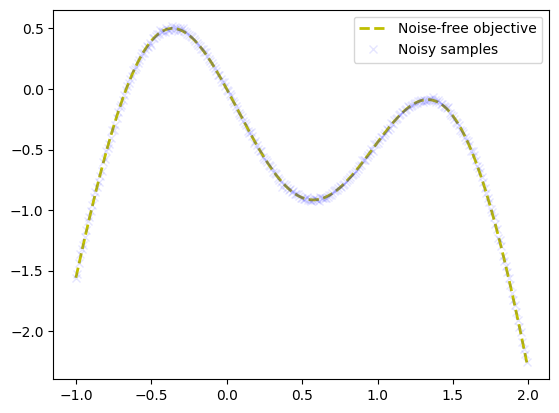

In [8]:
# Dense grid of points within bounds
X = jnp.arange(-1, 2, 0.01).reshape(-1, 1)
# Noise-free objective function values at X 
Y = f(X,0)
# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
# plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();